# **Generalization: The goal of machine learning**



*   ***Optimization*** refers to the process of adjusting a model to get the best performance possible on the training data (the learning in machine learning).
*   ***Generalization*** refers to how well the trained model performs on data it has never seen before.

The goal of the game is to get good generalization, of course, but you don’t control generalization; you can only fit the model to its training data. If you
do that too well, overfitting kicks in and generalization suffers.



## **Causes of overfitting**



*   Noisy trainging data
*   Ambiguous features

*   Rare features and spurious correlations

In [ ]:
#Add white noise or all-zeros channels to MNIST
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255


train_images_with_white_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], 
    axis=1) #axis=1 adds 784 to 784 otherwise it would add 60000 to 60000

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [ ]:
train_images_with_white_noise_channels.shape

(60000, 1568)

In [ ]:
#Training the model
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation="relu"),
      layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
    train_images_with_white_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 0.6104 - accuracy: 0.8124 - val_loss: 0.2634 - val_accuracy: 0.9198
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2489 - accuracy: 0.9227 - val_loss: 0.2312 - val_accuracy: 0.9294
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1603 - accuracy: 0.9496 - val_loss: 0.1965 - val_accuracy: 0.9380
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1138 - accuracy: 0.9658 - val_loss: 0.1360 - val_accuracy: 0.9613
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0818 - accuracy: 0.9743 - val_loss: 0.1462 - val_accuracy: 0.9549
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0612 - accuracy: 0.9804 - val_loss: 0.1349 - val_accuracy: 0.9628
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.1447 - val_accuracy: 0.9601

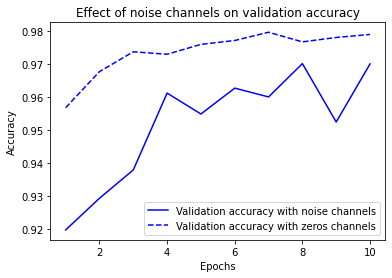

In [ ]:
#plotting a validation accuracy comparison
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## **Feature Selection**

In cases where you aren’t sure whether the features you have are informative or distracting, it’s common to do ***feature selection*** before training. 


The typical way to do **feature selection** is to compute some usefulness score for each feature available—a measure of how informative the feature is with respect to the task, such as the mutual information between the feature and the labels—and only keep features that
are above some threshold. Doing this would filter out the white noise channels.

## **The nature of generalization in deep learning**

In [ ]:
#Fitting a MNIST model with randomly shuffled labels
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, 
          random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 2.3163 - accuracy: 0.1048 - val_loss: 2.3072 - val_accuracy: 0.1071
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2996 - accuracy: 0.1195 - val_loss: 2.3112 - val_accuracy: 0.1040
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2890 - accuracy: 0.1309 - val_loss: 2.3251 - val_accuracy: 0.1047
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2736 - accuracy: 0.1450 - val_loss: 2.3285 - val_accuracy: 0.1065
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2525 - accuracy: 0.1601 - val_loss: 2.3438 - val_accuracy: 0.0978
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2310 - accuracy: 0.1723 - val_loss: 2.3598 - val_accuracy: 0.1025
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.2045 - accuracy: 0.1907 - val_loss: 2.3812 - val_accuracy: 0.0945

## **Training Data**
A “dense sampling” in this context means that the training data should densely cover the entirety of the input data
manifold.

The best way to improve a deep learning model is to train it on more data or better data.


## **Diffrence between Parameters and Hyperparameters**

**Hyperparameter:** Number of layers or size of the layers are called the hyperparameters of the model.

**Parameter:** Parameter are the network's weights.

## **Model evaluation**

## **Improving model fit**

To achieve the perfect fit, you must first overfit. Since you don’t know in advance where the boundary lies, you must cross it to find it. Thus, your initial goal as you start working on a problem is to achieve a model that shows some generalization power and that is able to overfit. Once you have such a model, you’ll focus on refining gener-
alization by fighting overfitting.

In [ ]:
(train_images, train_labels), _ = mnist.load_data() 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255
model = keras.Sequential([ 
    layers.Dense(512, activation="relu"), 
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10, 
          batch_size=128, 
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 915.7247 - accuracy: 0.4016 - val_loss: 4.8840 - val_accuracy: 0.3041
Epoch 2/10
375/375 [==============================] - 9s 24ms/step - loss: 4.5743 - accuracy: 0.2548 - val_loss: 2.2533 - val_accuracy: 0.2895
Epoch 3/10
375/375 [==============================] - 10s 26ms/step - loss: 2.8622 - accuracy: 0.2780 - val_loss: 2.4308 - val_accuracy: 0.2889
Epoch 4/10
375/375 [==============================] - 9s 25ms/step - loss: 2.6637 - accuracy: 0.2822 - val_loss: 1.9205 - val_accuracy: 0.2688
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 3.4666 - accuracy: 0.2992 - val_loss: 2.0808 - val_accuracy: 0.2055
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4138 - accuracy: 0.3025 - val_loss: 2.5101 - val_accuracy: 0.3696
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.9028 - accuracy: 0.3338 - val_loss: 5.7866 - val_accuracy: 0.4

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-12),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 2.4164 - accuracy: 0.0819 - val_loss: 2.4234 - val_accuracy: 0.0836
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 2.4164 - accuracy: 0.0819 - val_loss: 2.4234 - val_accuracy: 0.0836
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4164 - accuracy: 0.0819 - val_loss: 2.4234 - val_accuracy: 0.0836
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4164 - accuracy: 0.0819 - val_loss: 2.4234 - val_accuracy: 0.0836
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4164 - accuracy: 0.0819 - val_loss: 2.4234 - val_accuracy: 0.0836
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4164 - accuracy: 0.0819 - val_loss: 2.4234 - val_accuracy: 0.0836
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4164 - accuracy: 0.0819 - val_loss: 2.4234 - val_accuracy: 0.0836

In [ ]:
#A simple logistic regression on MNIST
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3545 - accuracy: 0.8991 - val_loss: 0.1871 - val_accuracy: 0.9452
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1519 - accuracy: 0.9550 - val_loss: 0.1246 - val_accuracy: 0.9638
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1079 - accuracy: 0.9678 - val_loss: 0.1092 - val_accuracy: 0.9676
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0838 - accuracy: 0.9739 - val_loss: 0.1034 - val_accuracy: 0.9695
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0969 - val_accuracy: 0.9705
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.0885 - val_accuracy: 0.9750
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.1103 - val_accuracy: 0.9702
Epoch 

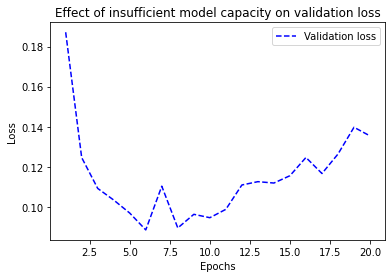

In [ ]:
import matplotlib.pyplot as plt 
val_loss = history_small_model.history["val_loss"] 
epochs = range(1, 21) 
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss") 
plt.xlabel("Epochs") 
plt.ylabel("Loss")
plt.legend()
plt.show()

## **Data Curation**

Deep learning is curve fitting, not magic.

Spending more effort and money on data collection almost always yields a much greater return on investment than spending the same on developing a better model.


* Make sure you have enough data. Remember that you need a dense sampling of the input-cross-output space. More data will yield a better model. Sometimes, problems that seem impossible at first become solvable with a larger dataset.
* Minimize labeling errors—visualize your inputs to check for anomalies, and proofread your labels.
* Clean your data and deal with missing values. 
* If you have many features and you aren’t sure which ones are actually useful, do
feature selection.

## **Feature Engineering**

Feature engineering is the process of using your own knowledge about the data and about the machine learning algorithm at hand (in this case, a neural network) to make the algorithm work better by applying hardcoded (non-learned) transformations to the
data before it goes into the model.

A particularly important way to improve the generalization potential of your data is feature engineering. For most machine learning problems, feature engineering is a key
ingredient for success. 

The essence of feature engineering: making a problem easier by expressing it in a simpler way. Make the latent manifold smoother, simpler, better organized.
Doing so usually requires understanding the problem in depth.


### **Regularization Techniques**

#### **Reducing The Network's Size**

In [ ]:
from tensorflow.keras.datasets import imdb 
(train_data, train_labels), _ = imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences): 
    results[i, sequence] = 1.
  return results
train_data = vectorize_sequences(train_data)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5293 - accuracy: 0.7696 - val_loss: 0.3895 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3063 - accuracy: 0.9010 - val_loss: 0.3233 - val_accuracy: 0.8744
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2244 - accuracy: 0.9253 - val_loss: 0.2799 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1765 - accuracy: 0.9432 - val_loss: 0.2740 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1450 - accuracy: 0.9545 - val_loss: 0.2800 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1185 - accuracy: 0.9641 - val_loss: 0.2948 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1009 - accuracy: 0.9693 - val_loss: 0.3192 - val_accuracy: 0.8822
Epoch 8/20
30

In [ ]:
#Smaller model
model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5775 - accuracy: 0.7696 - val_loss: 0.4709 - val_accuracy: 0.8559
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4020 - accuracy: 0.8865 - val_loss: 0.3757 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3135 - accuracy: 0.9093 - val_loss: 0.3264 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2565 - accuracy: 0.9236 - val_loss: 0.3018 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2183 - accuracy: 0.9343 - val_loss: 0.2841 - val_accuracy: 0.8916
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1885 - accuracy: 0.9437 - val_loss: 0.2858 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1669 - accuracy: 0.9499 - val_loss: 0.2733 - val_accuracy: 0.8900
Epoch 8/20
30

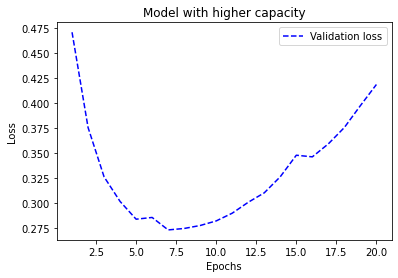

In [ ]:
import matplotlib.pyplot as plt 
val_loss = history_smaller_model.history["val_loss"] 
epochs = range(1, 21) 
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Model with higher capacity") 
plt.xlabel("Epochs") 
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#Version of the model with higher capacity
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

# The more capacity the model has, the more quickly it can 
# model the training data (resulting in a low training loss), 
# but the more susceptible it is to overfitting 
# (resulting in a large difference between the training and validation loss).

Epoch 1/20
30/30 [==============================] - 10s 311ms/step - loss: 0.5750 - accuracy: 0.7519 - val_loss: 0.3160 - val_accuracy: 0.8898
Epoch 2/20
30/30 [==============================] - 9s 295ms/step - loss: 0.2509 - accuracy: 0.9017 - val_loss: 0.2672 - val_accuracy: 0.8939
Epoch 3/20
30/30 [==============================] - 9s 294ms/step - loss: 0.1599 - accuracy: 0.9415 - val_loss: 0.2990 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 9s 295ms/step - loss: 0.0718 - accuracy: 0.9744 - val_loss: 0.3613 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 9s 296ms/step - loss: 0.1023 - accuracy: 0.9783 - val_loss: 0.3622 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 10s 322ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.5358 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 9s 299ms/step - loss: 5.2024e-04 - accuracy: 1.0000 - val_loss: 0.6250 - val_accuracy: 0.8893


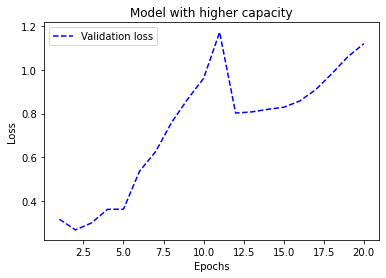

In [ ]:
import matplotlib.pyplot as plt 
val_loss = history_larger_model.history["val_loss"] 
epochs = range(1, 21) 
plt.plot(epochs, val_loss, "b--", label="Validation loss")
plt.title("Model with higher capacity") 
plt.xlabel("Epochs") 
plt.ylabel("Loss")
plt.legend()
plt.show()

#### **Adding Weight Regularization**

In [ ]:
#Adding L2 regularization
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
    )

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5951 - accuracy: 0.7949 - val_loss: 0.4752 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4160 - accuracy: 0.8931 - val_loss: 0.4070 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3521 - accuracy: 0.9111 - val_loss: 0.3754 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3167 - accuracy: 0.9197 - val_loss: 0.3759 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2950 - accuracy: 0.9259 - val_loss: 0.3620 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2816 - accuracy: 0.9317 - val_loss: 0.3607 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2690 - accuracy: 0.9380 - val_loss: 0.3610 - val_accuracy: 0.8846
Epoch 8/20
30

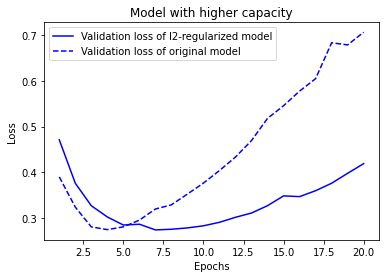

In [ ]:
import matplotlib.pyplot as plt 
val_loss_ori = history_original.history["val_loss"]
val_loss_l2 = history_l2_reg.history["val_loss"] 
epochs = range(1, 21) 
plt.plot(epochs, val_loss, "b", label="Validation loss of l2-regularized model")
plt.plot(epochs, val_loss_ori, "b--", label="Validation loss of original model")
plt.title("Model with higher capacity") 
plt.xlabel("Epochs") 
plt.ylabel("Loss")
plt.legend()
plt.show()

#### **Adding Dropout**

In [ ]:
model = keras.Sequential([ 
    layers.Dense(16, activation="relu"), 
    layers.Dropout(0.5), 
    layers.Dense(16, activation="relu"), 
    layers.Dropout(0.5), 
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy", 
              metrics=["accuracy"])
history_dropout = model.fit( 
    train_data, train_labels,
    epochs=20, batch_size=512, 
    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6025 - accuracy: 0.6742 - val_loss: 0.4492 - val_accuracy: 0.8574
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4615 - accuracy: 0.7971 - val_loss: 0.3496 - val_accuracy: 0.8778
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3793 - accuracy: 0.8433 - val_loss: 0.3236 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3201 - accuracy: 0.8821 - val_loss: 0.2771 - val_accuracy: 0.8927
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2729 - accuracy: 0.9020 - val_loss: 0.2770 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2388 - accuracy: 0.9172 - val_loss: 0.2891 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2042 - accuracy: 0.9287 - val_loss: 0.2956 - val_accuracy: 0.8859
Epoch 8/20
30

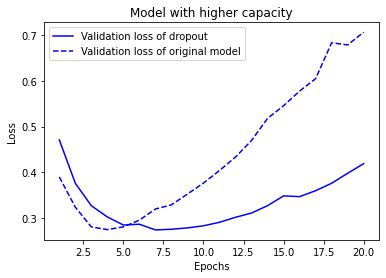

In [ ]:
import matplotlib.pyplot as plt 
val_loss_ori = history_original.history["val_loss"]
val_loss_l2 = history_dropout.history["val_loss"] 
epochs = range(1, 21) 
plt.plot(epochs, val_loss, "b", label="Validation loss of dropout")
plt.plot(epochs, val_loss_ori, "b--", label="Validation loss of original model")
plt.title("Model with higher capacity") 
plt.xlabel("Epochs") 
plt.ylabel("Loss")
plt.legend()
plt.show()